In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type','society','availability','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Sarth\AppData\Local\Temp/ipykernel_11856/1156995945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(isfloat)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [15]:
def con_squ_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
con_squ_to_num('2100 - 2850')

2475.0

In [17]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(con_squ_to_num)
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
df5=df4.copy()
df5['per_squft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,BHK,per_squft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
len(df5.location.unique())

1304

In [20]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [21]:
len(location_stats[location_stats<=10])

1052

In [22]:
location_stat_lessthan10=location_stats[location_stats<=10]
location_stat_lessthan10


location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [23]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,per_squft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [24]:
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,per_squft
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Double Road,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [25]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]
df6

,location,size,total_sqft,bath,price,BHK,per_squft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [26]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.per_squft)
        st=np.std(subdf.per_squft)
        reduced_df=subdf[(subdf.per_squft>(m-st))&(subdf.per_squft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_outlier(df6)
df7.shape

(9267, 7)

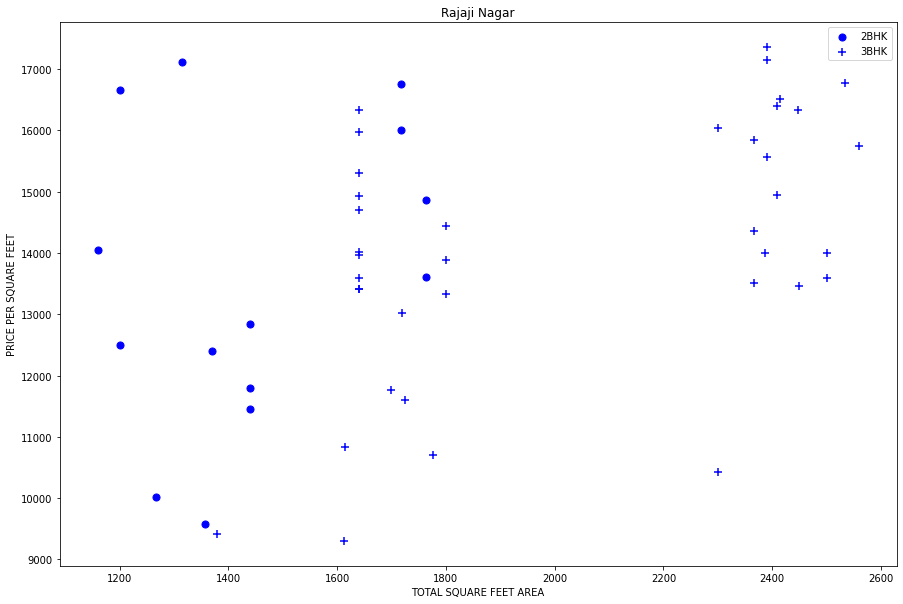

In [27]:
def plot_scatter(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.per_squft,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.per_squft,marker='+',color='blue',label='3BHK',s=50)
    plt.xlabel("TOTAL SQUARE FEET AREA")
    plt.ylabel("PRICE PER SQUARE FEET")
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter(df7,"Rajaji Nagar")        
    

In [36]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for BHK,bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK]={
                'mean':np.mean(bhk_df.per_squft),
                'std':np.std(bhk_df.per_squft),
                'count':bhk_df.shape[0]
            }
    for bhk,bhk_df in location_df.groupby('BHK'):
        stats=bhk_stats.get(BHK-1)
        if stats and stats['count']>5:
            exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.per_squft<(stats['mean'])].index.values)
            return df.drop(exclude_indices,axis='index')
df8=remove_bhk_outlier(df7)
print(df7)

                   location       size  total_sqft  bath   price  BHK  \
0      1st Block BEL Layout      3 BHK      1540.0   3.0   85.00    3   
1      1st Block HBR Layout      1 BHK       600.0   1.0   45.00    1   
2      1st Block HBR Layout      4 BHK      3150.0   4.0  150.00    4   
3     1st Block HRBR Layout      3 BHK      2300.0   3.0   80.00    3   
4     1st Block HRBR Layout      2 BHK      1250.0   2.0   67.00    2   
...                     ...        ...         ...   ...     ...  ...   
9262           manyata park      3 BHK      1780.0   3.0   84.83    3   
9263                  south  3 Bedroom      2400.0   2.0  480.00    3   
9264               tc.palya  2 Bedroom       880.0   2.0   48.00    2   
9265               tc.palya  2 Bedroom      1000.0   2.0   55.00    2   
9266               tc.palya  3 Bedroom      1400.0   2.0   78.00    3   

         per_squft  
0      5519.480519  
1      7500.000000  
2      4761.904762  
3      3478.260870  
4      5360.000000

In [37]:
df7

,location,size,total_sqft,bath,price,BHK,per_squft
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.00,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.00,1,7500.000000
2,1st Block HBR Layout,4 BHK,3150.0,4.0,150.00,4,4761.904762
3,1st Block HRBR Layout,3 BHK,2300.0,3.0,80.00,3,3478.260870
4,1st Block HRBR Layout,2 BHK,1250.0,2.0,67.00,2,5360.000000
...,...,...,...,...,...,...,...
9262,manyata park,3 BHK,1780.0,3.0,84.83,3,4765.730337
9263,south,3 Bedroom,2400.0,2.0,480.00,3,20000.000000
9264,tc.palya,2 Bedroom,880.0,2.0,48.00,2,5454.545455
9265,tc.palya,2 Bedroom,1000.0,2.0,55.00,2,5500.000000


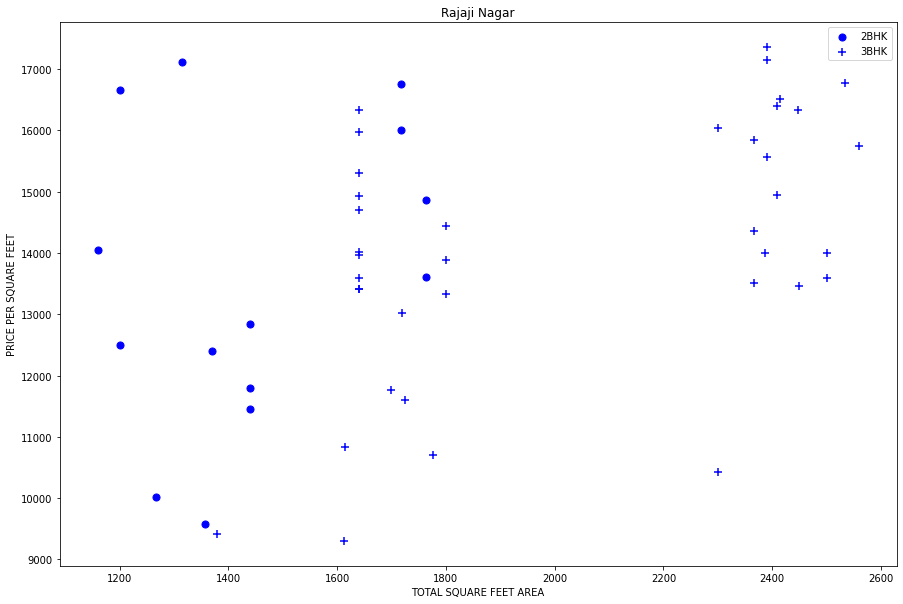

In [40]:
plot_scatter(df7,"Rajaji Nagar") 